In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('train.txt',sep = ';',header = None,names = ['text','emotion'])

In [49]:
df

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [50]:
df_unique = df['emotion'].unique()
emotion = {}
i = 0
for col in df_unique:
    emotion[col] = i 
    i += 1
df['emotion']= df['emotion'].map(emotion)


In [51]:
df['text'] =df['text'].apply(lambda x:x.lower())


In [52]:
df

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,5
15998,i feel like this was such a rude comment and i...,1


In [53]:
import string
def remove_punc(txt):

  return txt.translate(str.maketrans('','',string.punctuation))
df['text'] = df['text'].apply(remove_punc)



In [54]:
df

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,5
15998,i feel like this was such a rude comment and i...,1


In [55]:
def remove_number(txt):
     new = ""
     for i in txt:
         if not i.isdigit():
             new = new + i
     return new 
df['text'] = df['text'].apply(remove_number)



In [56]:
df

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,5
15998,i feel like this was such a rude comment and i...,1


In [57]:
def remove_emoji(txt):
    new = "" 
    for i in txt:
        if  i.isascii(): 
             new += i 
    return new

df['text'] =df['text'].apply(remove_emoji)

In [58]:
df

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,5
15998,i feel like this was such a rude comment and i...,1


In [59]:
import nltk
from  nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [60]:
stopword = set(stopwords.words('english'))

In [61]:
df.loc[1]['text']

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [62]:
def remove(txt):
    word =txt.split()
    clean = []
    for i in word:
        if not i in stopword: 
            clean.append(i)
            
    return ' '.join(clean)   

In [63]:
df['text'] = df['text'].apply(remove)

In [64]:
df.loc[1]['text']

'go feeling hopeless damned hopeful around someone cares awake'

In [65]:
df

,text,emotion
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,1
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,1
...,...,...
15995,brief time beanbag said anna feel like beaten,0
15996,turning feel pathetic still waiting tables sub...,0
15997,feel strong good overall,5
15998,feel like rude comment im glad,1


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test =train_test_split(df['text'],df['emotion'],test_size= 0.2,random_state=40)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix


In [69]:
# countvectorizer = CountVectorizer(max_features=100,stop_words='english') 
countvectorizer = CountVectorizer(max_features=2000, min_df=5, stop_words='english')

x_train_number = countvectorizer.fit_transform(x_train)
x_test_number = countvectorizer.transform(x_test)



In [74]:
x_train.shape

(12800,)

In [76]:
x_test

13167    feel honoured happy become part wonderful team...
10800                         feel frightened small things
1359     feel greedy idealistic expect would want talk ...
7272     ive feeling little homesick days usual thing a...
14309                             feel rude going bathroom
                               ...                        
6500                             feel like treasured prize
13145    feel comfortable enough presentations front pr...
2038                        feel less intelligent watching
9885     feel kinda idiotic talked bass player shahzad ...
2450     feel like important keep taking critical look ...
Name: text, Length: 3200, dtype: object

In [70]:
model = MultinomialNB() 
model.fit(x_train_number,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [25]:
# y_pred = model.predict(x_train_number)
# y_test_pred = model.predict(x_test_number)
y_train_pred = model.predict(x_train_number)
y_test_pred = model.predict(x_test_number)

In [26]:
print(accuracy_score(y_test, y_test_pred))

0.8459375


In [27]:
classification_report(y_test,y_test_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.90      0.88       933\n           1       0.85      0.82      0.84       442\n           2       0.82      0.68      0.75       264\n           3       0.73      0.53      0.61       118\n           4       0.77      0.80      0.79       352\n           5       0.86      0.90      0.88      1091\n\n    accuracy                           0.85      3200\n   macro avg       0.82      0.77      0.79      3200\nweighted avg       0.84      0.85      0.84      3200\n'

In [28]:
cm = confusion_matrix(y_test, y_test_pred)

In [29]:
y_train_pred = model.predict(x_train_number)
train_acc = accuracy_score(y_train, y_train_pred)

In [30]:
y_test_pred = model.predict(x_test_number)
test_acc = accuracy_score(y_test, y_test_pred)

In [31]:
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.921953125
Test Accuracy: 0.8459375


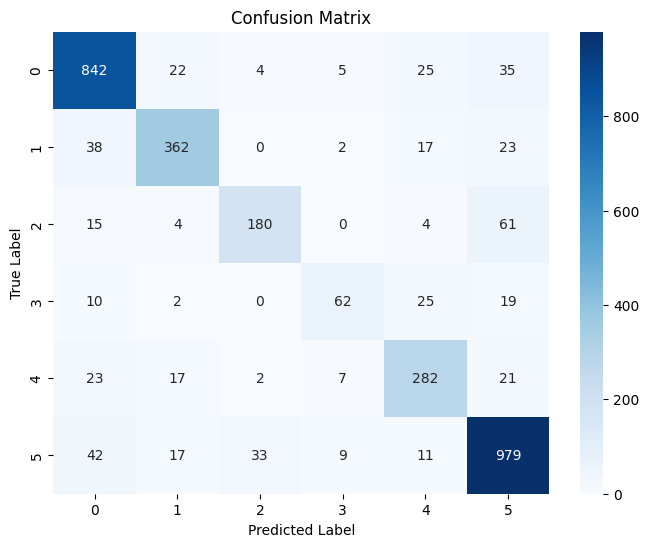

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [34]:
# dt_model = DecisionTreeClassifier(random_state=42) 
dt_model = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, random_state=42)

dt_model.fit(x_train_number, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree
y_train_pred_dt = dt_model.predict(x_train_number)
y_test_pred_dt = dt_model.predict(x_test_number)

In [36]:
y_train_pred_dt

array([5, 5, 4, ..., 2, 1, 5], shape=(12800,))

In [37]:
y_test_pred_dt 

array([5, 4, 1, ..., 5, 0, 5], shape=(3200,))

In [38]:
dt= accuracy_score(x_train, y_train_pred_dt)*100
 # accuracy_score(y_test, y_test_pred_dt)*100

F:\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


In [39]:
cm_nb = confusion_matrix(y_test,y_test_pred_dt)

In [40]:
dt = accuracy_score(y_test, y_test_pred_dt)

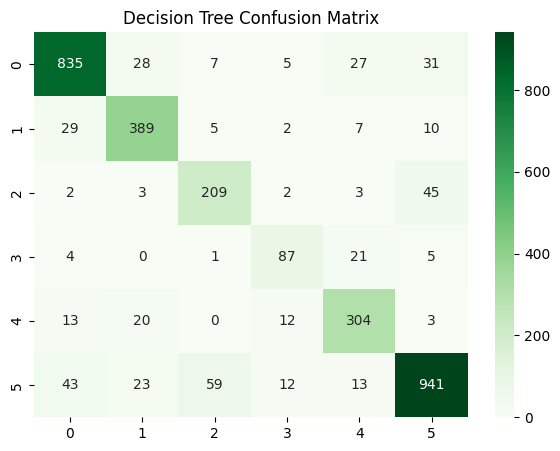

In [41]:
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(7,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

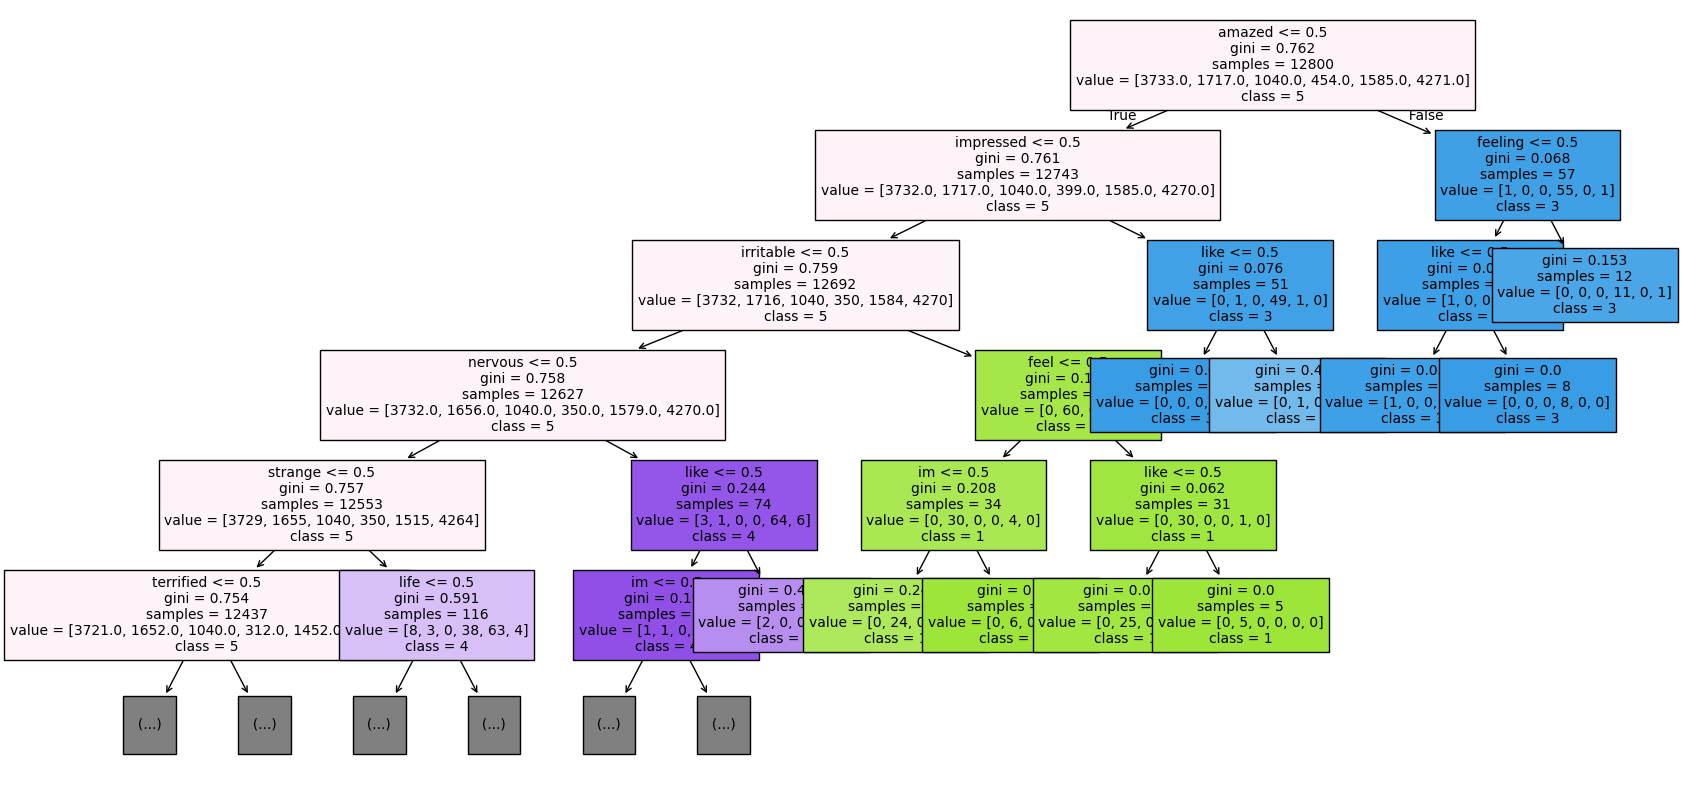

In [43]:

plt.figure(figsize=(20,10))
plot_tree(dt_model,  # <-- এখানে dt_model object দিতে হবে
          max_depth=5,
          filled=True,
          feature_names=countvectorizer.get_feature_names_out(),
          class_names=[str(c) for c in set(y_train)],
          fontsize=10)
plt.show()